# Trabalho Final - Intrudução à Ciência dos Dados

## Análise Draft NBA

### Membros do grupo:

    - Flávio Lúcio Corrêa Júnior - 2018055014
    - Henry Tamekloe - 2018500044
    - Vinícius Julião Ramos - 2018054630

## Introdução

Como ja sabemos, o NBA é uma das ligas de basquete mais famosas nao só nos EUA mas no mundo inteiro. Por isso, existe muita preocupacao para entender melhor o comportamento de alguns aspectos do esporte em geral, por exemplo: atletas, times, universidades e etc. Com esta motivacao, pegamos uma base para entender o comportamento do "NBA Draft Mock" que acontece todos os anos. O "NBA Draft Mock" é um processo onde os atletas das universidades do mundo todo são selecionados pelos times do NBA baseando-se no desempenho dos atletas e das equipes na temporada anterior.

O processo conta com algumas carácteristicas peculiares como, por exemplo, os times com desempenho ruim no último ano tem a vantagem para selecionar atletas mais cedo do que os times que tiveram bom desempenho. Além disso, os atletas que não foram draftados nao podem participar novamente no draft, restando apenas a opção de contratação para alguma equipe que o queira. 

Para começar nossa análise, pegamos duas bases do **NBA_DRAFT_1980_2017** e **NBA Player Data**. Basicamente, o conjunto de dados contém, nas linhas, informações de jogadores sob um período de duas a três décadas em que este foi parte de uma equipe. Além disso, temos informações de variáveis demográficas como idade, altura, peso, local de nascimento e detalhes de biograficos como o time jogado, ano de draft e round. E, por último, estatísticas básicas como partidas jogadas, número médio de pontos, rebotes, assistências e etc.

## Motivação
Muitos jovens que vivem nos Estados Unidos desejam ingressar no mundo profissional dos esportes, para isso, estes jovens devem ingressar em um universidade ou em um colégio a fim de se candidatarem para o painel de seleção de jogadores (o draft). Isso faz com que ao longo da vida de estudante, uma pessoa tome diversas escolhas sobre a carreira esportiva, dado que o draft é o principal meio de ingresso nos esportes e há uma quantia significativa de jogadores que provém das mais variadas universidades e colégios (que de forma geral chamaremos de *college*) do país.

Imagine-se como um estudante que desde criança tem aptidão para o basquete, é o melhor jogador entre o grupo de amigos e todos o elogiam por isso. É possível, que desde cedo deseje saber qual caminho trilhar para se tornar um dia um astro da NBA ou então até mesmo, deseje utiliza tal esporte como forma de realização de um sonho de ser famoso e reconhecido. Então, na análise de decisões sobre os rumos que um jogador deve trilhar, seguiremos neste trabalho uma observação detalhada sobre quais seriam os principais *colleges* que produzem jogadores para o país, sendo que dessa forma, e se há verdadeiramente uma boa escolha de instituição de ensino capaz impulsionar a carreira esportiva de um estudante.

Para tal determinação, levantaremos algumas perguntas que podemos responder através da análise estatística dos dados. Tais perguntas motivarão hipóteses e produzirão uma linha de raciocínio baseadas em pesquisas e exploração do comportamento das bases de dados escolhidas para o trabalho. Podemos classificas as perguntas como as seguintes:

1. Existem universidades que se destacam no draft?
2. Qual a relação entre ser um AllStar e ser draftado a partir de determinada universidade?
3. Há universidades que aumentam as chances de determinado jogador sejam draftados ou não?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("all_seasons.csv")

## Tratamento do dados

Os datasets possuem as informações necessárias para o estudo que se deseja realizar, entretanto, os dados não estão totalmente prontos para a análise e comparações. Alguns dados precisam ser convertidos em numéricos ao invés de strings além de necessitar de transformações que auxiliarão na plotagem de determinados graficos.

Uma vez que há uma análise categórica a cerca dos dados, deve-se converter tal categoria com dados strings para dados numéricos a fim de possibilitar que o computador interprete essa informação na aplicação de um método de aprendizagem de máquina. Por fim, também vale ressaltar que devido ao grande tamanho da base de dados, que são dados ao longo do tempo, deseja-se analisar um comportamento condizente com a atualidade, por isso, também é preciso reduzir a quantidade de informações de acordo com um intervalo de tempo.

#### Normalizando o dado "temporada"
Visto que na NBA as temporadas iniciam-se no final de determinado ano e encerram-se no ano seguinte, os dados de temporada, na base de dados são dados como uma string indicando o ano de início e de fim da temporada. Entretanto, por motivos de facilitar essa comparação, modificaremos tal atributo, de forma que identificaremos uma temporada apenas pelo seu ano de início, convertendo tal atributo para um dado numérico.

In [3]:
print('-- Antes do tratamento')
print(df['season'].head())

#tratando a informação da temporada
new = df['season'].str.split('-', n=1, expand=True)
df['season'] = pd.to_numeric(new[0])
print('\n-- Após o tratamento')
print(df['season'].head())

-- Antes do tratamento
0    1996-97
1    1996-97
2    1996-97
3    1996-97
4    1996-97
Name: season, dtype: object

-- Após o tratamento
0    1996
1    1996
2    1996
3    1996
4    1996
Name: season, dtype: int64


#### Tratamento dos *stats* de cada jogador
Nessa base de dados, há informações sobre as temporadas que os jogadores disputaram na NBA e também há informações sobre o ultimo ano do jogador no *college*, isso quer dizer que para a análise do draft, devemos obter apenas os dados dos jogadores referentes às suas participações nas categorias de base, excluindo dados da carreira profissional. Os scouts da primeira temporada de um jogador, envolvem a média retroativa do jogador no *college*, essa é uma estratégia utilizada pelas equipes para definir o progresso de cada jogador na liga, desde sua contratação.

Cada vez mais, os times de esporte estão evoluindo sua maneira de avaliar o desempenho de jogadores, aplicando métodos de aprendizagem de máquina para especular a contribuição dos atletas a cada temporada. Para isso, é importante que hajam dados referentes às temporadas anteriores à profissionalização; fato que justifica a inserção dos dados do *college* na primeira temporada de cada jogador na liga principal.

In [4]:
# observando os dados de um jogador qualquer antes da transformação
print(df.shape)
df[df['player_name'] == 'A.J. Guyton']

(9561, 22)


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
1863,1863,A.J. Guyton,CHI,23.0,185.42,81.64656,Indiana,USA,2000,2,...,6.0,1.1,1.9,-12.4,0.018,0.053,0.169,0.495,0.198,2000
2425,2425,A.J. Guyton,CHI,24.0,185.42,81.64656,Indiana,USA,2000,2,...,5.4,1.0,1.8,-3.8,0.022,0.067,0.221,0.477,0.248,2001
2941,2941,A.J. Guyton,GSW,25.0,185.42,81.64656,Indiana,USA,2000,2,...,0.0,0.0,1.0,-3.9,0.000,0.000,0.282,0.000,0.400,2002


A inserção de dados do *college* para cada jogador em sua primeira temporada, demonstra além de tudo se o atleta, apesar de obter um alto desempenho nas categorias de base, conseguiu manter o alto nível esportivo. No exemplo demonstrado aqui, é possivel observar uma piora a cada tempoda, apesar de *scouts* expressivos em sua primeira temporada.

In [5]:
# removendo dados com nomes iguais, deixando apenas os com as menores seasons / ages
# obtendo a primeira temporada de cada jogador
df = df.loc[df.groupby("player_name")["age"].idxmin()]

print(df.shape)
df[df['player_name'] == 'A.J. Guyton']

(1892, 22)


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
1863,1863,A.J. Guyton,CHI,23.0,185.42,81.64656,Indiana,USA,2000,2,...,6.0,1.1,1.9,-12.4,0.018,0.053,0.169,0.495,0.198,2000


#### Categorização via One-Hot
É possível que seja necessário utilizar métodos de classificação para tentar predizer uma boa universidade ou alguma informaçãao a cerca das universidades. Então, por esse motivo, é necessário converter o dado "college", que trata-se de uma coluna do tipo *string*, em diversas colunas do tipo inteiros (ou até mesmo booleano) identificando se cada jogador pertence ou não a cada um dos *colleges* através da marcação de 0 e 1. Isso fará com que haja um acrescimo de colunas, equivalente à quantidade de *colleges* identificados.

In [6]:
# incluindo colunas para cada universidade onde para um jogador X a coluna correspondente
# a universidade Y tem o valor 1 se X percence a Y e 0 caso contrário
colleges = df['college'].unique()
colleges_map = {}
for college in colleges:
    college_column_name = college.lower().replace(" ", "_")
    colleges_map[college] = college_column_name
    df[college_column_name] = df['college'].apply(lambda c: 1 if c==college else 0)


# Validando se o dado está correto para o jogador indicado
assert df[df['player_name'] == 'A.J. Guyton']['indiana'].values[0] == 1

# A soma de todos os valore nas colunas que identificam colleges deve ser igual a 1
s = 0
for college in colleges:
    college_column_name = college.lower().replace(" ", "_")
    s+=df[df['player_name'] == 'A.J. Guyton'][college_column_name]

assert s.values[0] == 1

#### Mapeando os jogadores não draftados dos jogadores draftados
Nessa base de dados, há uma coluna de nome "draft_yer" que identifica quando um jogador fora concovado por uma equipe durante o draft, além de identificar se ele foi draftado ou não através de um coluna com o dado 'Undrafted' que identifica os jogadores que não foram convocados para a temporada da NBA via draft, mas sim por um contrato pós sessão de escolhas. Nisso, identificaremos que um jogador passou pela tentativa de draft no mesmo ano de sua primeira temporada, e criaremos uma coluna com um dado binário (0/1) identificando a partir da coluna "draft_year" se uma coluna possui o dado 'Undrafted' ou não.

In [7]:
# criando a nova coluna para jogadores selecionados no draft ou não
df['drafted'] = df['draft_year'].apply(lambda c: 1 if c!='Undrafted' else 0)
print(df.loc[df['draft_year'] == 'Undrafted',['drafted', 'draft_year']].head())

print('\n', df.loc[df['draft_year'] != 'Undrafted',['drafted', 'draft_year']].head())

      drafted draft_year
8902        0  Undrafted
4331        0  Undrafted
297         0  Undrafted
2938        0  Undrafted
7671        0  Undrafted

       drafted draft_year
299         1       1985
1426        1       1999
1863        1       2000
9396        1       2016
5923        1       2009


## Análise Exploratória
Durante a análise exploratória dos dados, será possível observar o comportamento da base de dados para alguns casos específicos e determinar certas afirmações que podem ser úteis para alguns estudos. Também é possível que em determinadas observações, identifique-se dados que podem ser acrescidos ou decrescidos da base pra auxiliar o estudo. Então, nessa sessão, também cabem certos tratamentos de dados para adaptação dos dados ao modelo de aprendizagem, o qual pretende-se gerar no futuro.

#### Identificando o comportamento por quartis da base de dados
Cada *college* é responsável por enviar certa quantia de alunos para a NBA, sendo assim, deseja-se saber o comportamento por quartis das instituições de ensino. Para saber se é possível avaliar a quantidade de jogadores em média que cada *college* prepara para a carreira esportiva, além de identificar se há *outliers*. A identificação de *outliers* é importante pois pode demonstrar uma possível tendência de algumas escolas em se destacarem no processo de seleção de jogadores, uma vez que é esse o possível estudo que deseja-se realizar dado como motivação deste trabalho.

Para tal tarefa, plotaremos um box plot a fim de identificar se há poucas universidades que se destacam em presença na liga nacional de basquete. Isso será importante na composição de futuras hipóteses.

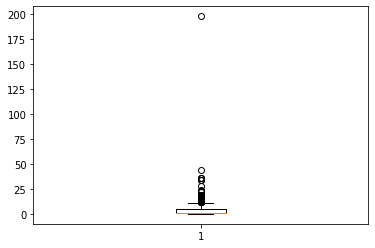

In [8]:
# plotar um box plot identificando a quantidade de jogadores draftados por college
plt.boxplot(df.groupby('college')['drafted'].sum())
plt.show()

De antemão é possível identificar que há um outlier significativo nos dados, e isso pode sugerir que há uma tendência. Então um segundo estudo pode demonstrar se é um caso isolado, um comportamento anômalo ou um dado indesejado. Ao ordenar os dados que foram plotados, identificaremos qual o college que exporta tal quantia de jogadores.

In [9]:
print(df.groupby('college')['drafted'].sum().sort_values()[::-1])

college
None                     198
Kentucky                  44
North Carolina            36
UCLA                      36
Duke                      36
                        ... 
Pfeiffer                   0
Florida International      0
Fordham                    0
George Mason               0
Montevallo                 0
Name: drafted, Length: 287, dtype: int64


Então temos identificado um dado indesejado, em que 198 dos jogadores da base da NBA não passaram por uma instituição de ensino cadastrada na liga nacional, ou não se candidataram ao draft em momento algum. Logo, cabe um novo tratamento dos dados para excluir a coluna criada pela técnica One-Hot e também as linhas referentes a estes mesmos jogadores.

In [10]:
df = df[df['college'] != 'None']
df = df.drop(columns=[colleges_map['None']])
del colleges_map['None']

Assim, pode-se observar através de uma simples listagem, todas as universidades que estão acima do 3º quatil através da identificação do valor que mapeia o 3º quartil e então demonstrar que algumas universidades estão melhor colocadas que outras, havendo uma certa discrepância entre algumas instituições.

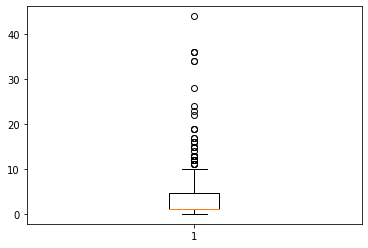

In [11]:
colleges_by_players = df.groupby('college')['drafted'].sum()
plt.boxplot(colleges_by_players)
plt.show()

As instituições que se destacam (instituições que "*outliers*") são classificadas por fornecer mais de 10 jogadores, como observado acima. Então, estas, podem ser identificadas por um simples grafico de barras, a fim de fixar quais as melhores instituições segundo os dados e, ao final, observar se há fator que explique tal comportamento ou é um acaso.

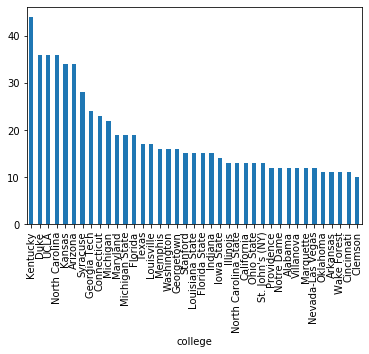

college
Kentucky                44
Duke                    36
UCLA                    36
North Carolina          36
Kansas                  34
Arizona                 34
Syracuse                28
Georgia Tech            24
Connecticut             23
Michigan                22
Maryland                19
Michigan State          19
Florida                 19
Texas                   17
Louisville              17
Memphis                 16
Washington              16
Georgetown              16
Stanford                15
Louisiana State         15
Florida State           15
Indiana                 15
Iowa State              14
Illinois                13
North Carolina State    13
California              13
Ohio State              13
St. John's (NY)         13
Providence              12
Notre Dame              12
Alabama                 12
Villanova               12
Marquette               12
Nevada-Las Vegas        12
Oklahoma                11
Arkansas                11
Wake Forest         

In [12]:
colleges_by_players.sort_values()[:-40:-1].plot.bar()
plt.show()

print(colleges_by_players.sort_values()[:-40:-1])

Uma possível abordagem para o futuro jogador da NBA seria identificar que nem sempre é tão necessário estar em um *college* para se tornar um grande jogador. Uma vez que a própria base de dados nos dá 1820 jogadores diferentes dos quais 198 não se candidataram ao draft. Sendo que foram contratados em janelas de transferências entre times fora da liga principal de basquete. Então, como observado nos dados, mais de 10% dos jogaores entre 2000 e 2016 (198$\div$1820) entraram na liga de uma maneira diferente do draft.

#### Analisando os *stats* dos jogadores

Para que um jogador seja convocado por uma equipe da NBA, este deve ser um bom jogador, ou seja: deve ter boas pontuações e notas nas principais caracteírsticas analisadas. Para isso, iniciaremos uma observação do comportamento médio para cada um dos *stats*/*scouts*, assim pode-se ainda especular a cerca de um jogador se tornar ou não um grande astro do basquete (*Allstar*), uma vez que os astros das temporadas são analisados de acordo com estes mesmos parâmetros. Dessa forma, o aluno que deseja se tornar um grande astro do basquete, pode observar qual a pontuação mínima em cada *scout* deve alcançar e manter para que realize o desejo de entrar na principal liga de basquete do mundo.

Dois gráficos serão mostrados, levando em conta apenas os jogadores que se canditaram ao draft, demonstrando a média do comportamento dos jogadores convocados e dos jogadores não convocados.

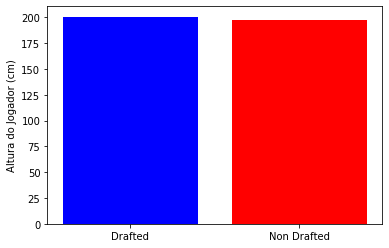

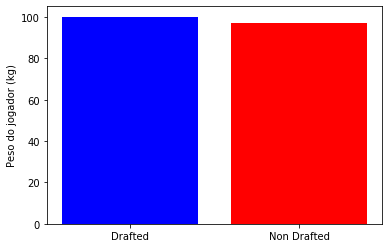

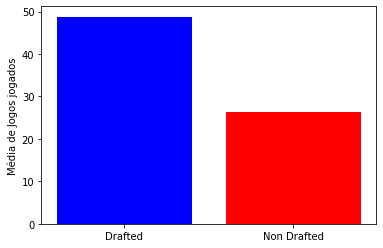

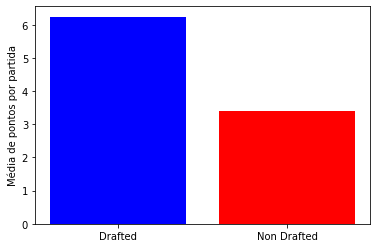

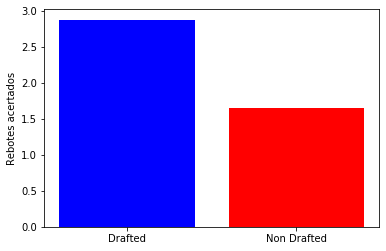

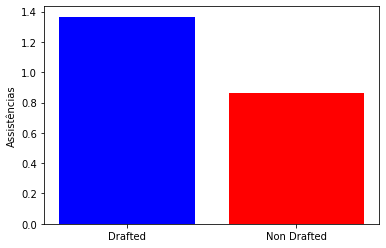

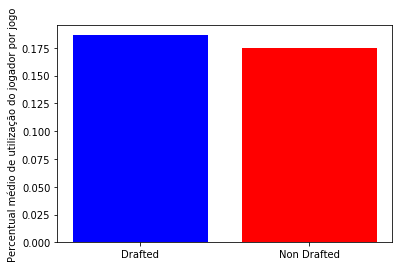

In [13]:
draft_status = ['Drafted', 'Non Drafted']
scout_attr = ['player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'usg_pct']
scout_names = ['Altura do Jogador (cm)', 'Peso do jogador (kg)', 'Média de Jogos jogados', 'Média de pontos por partida','Rebotes acertados', 'Assistências', 
               'Percentual médio de utilização do jogador por jogo']

data_diff = pd.DataFrame(columns=draft_status, index=scout_names)

for i in range(len(scout_attr)):
    non_drafted_data = df.loc[df['drafted']!=1, scout_attr[i]].mean(axis=0)
    drafted_data = df.loc[df['drafted']==1, scout_attr[i]].mean(axis=0)
    data_diff.iloc[i] = [drafted_data, non_drafted_data]
    plt.bar(draft_status, [drafted_data, non_drafted_data], color=['blue', 'red'])
    plt.ylabel(scout_names[i])
    plt.show()



Baseando-se nos gráficos, é possível observar que há uma relação entre os *scouts* dos jogadores e se eles foram ou não draftados. Podendo-se entender que, no caso do atributo *college* ser uma diferencial na escolha do atleta este não é um atributo suficiente para definir se o aluno será convocado para a NBA. Sendo assim, há diversas variáveis que devem ser analisadas a fim de classificar se determinado jogador é um bom atleta. Um fato que já é conhecido, o atributo 'usg_pct'(percentual médio de utilização do jogador na partida), é um determinante de qualidade, uma vez que é fácil de se imaginar que os bons jogadores sejam utilizados por mais tempo, ou seja, os atletas com valores altos de 'usg_pct', provavelmente são mais bem notados do que os demais.

Mesmo que os gráficos demonstrem que a diferença é sutil entre os draftados e não draftados, quanto ao atributo 'usg_pct', a diferença é reconhecida, entretando devendo-se considerar os demais atributos, uma vez que um atleta deve possuir alguma outra qualidade prática (quantidade de pontos, quantidade de assistências, rebotes acertados e etc). Nesse mesmo raciocínio, pode-se compor hipóteses sobre a o comportamento dos jogadores aprovados e os demais atributos, observando se os dados são de certa forma aleatórios entre si, ou seja, se não há uma correlação entre estes.

Observe na lista a seguir que na média, os jogadores draftados possuem um desempenho maior que os não draftados, sendo que em alguns casos é possível reconhecer uma diferença muito grande, que possivelmente são os outros fatores de grande peso na definição da aprovação ou reprovação de um jogador no draft. Futuramente, esses fatores serão explorados como forma de previsão de alguns dados.

In [14]:
data_diff

,Drafted,Non Drafted
Altura do Jogador (cm),200.666,197.84
Peso do jogador (kg),100.104,96.9128
Média de Jogos jogados,48.7729,26.2263
Média de pontos por partida,6.24385,3.39169
Rebotes acertados,2.87316,1.65058
Assistências,1.36614,0.861894
Percentual médio de utilização do jogador por jogo,0.186405,0.174647


### Resumindo
#### Resposta da pergunta "Existem universidades que se destacam no draft?".

Dada a análise exploratória desses dados, conseguiu-se observar relações que implicam na convocação de determinado jogador para a NBA, isso faz com que possa-se explorar a capacidade de alguns atributos em prever os resultados de um outro possível *draft*. Essa análise exploratória tinha como pretexto demonstrar a existência de instituições de ensino que se destacam pela quantidade de jogadores aprovados para a NBA, após mostrar que há universidades que se destacam, criou-se uma linha de raciocínio capaz de demonstrar que esse não pode ser o único atributo utilizado para explicar se um jogador será ou não aprovado, visto que os jogadores draftados, em média possuem *scouts* muito mais significantes do que os não draftados. 

O estudo aqui realizado, respaldará em uma análise de um possível comportamento aleatório dos atributos, tentando entender se as hipóteses aqui levantadas são coerentes. Esse fator, será determinante para analisar se é possível utilizar alguns atributos da base para entender se possívelmente um jogador será draftado ou não.

## Caracterização

Baseando-se nos testes da etapa anterior, agora deseja-se realizar um estudo prático a cerca da possibilidade em prever resultados de acordo com outros dados. Tal tarefa, tem como base, os dados obtidos através da análises realizadas anteriormente, em que os observou-se a existência de comportamentos aleatórios além de explorar hispóteses que trouxeram uma nova perspectiva de visualização dos dados. Para isso utlizaremos de dois métodos para abordar os parâmetros da base de dados, um classificador e um regressor, cada qual explorando a idéia de que é possível entender um resultado levando em consideração atributos chave.

### Classificação

A motivação deste trabalho, consiste em analisar se existem universidades capazes de promoverem melhor determinador jogador, então para esse momento utilizaremos uma regressão em que tomaremos como atributos principais os principais scouts dos jogadores, além da informação sobre qual universidade determinado atleta pertence. Deseja ainda, realizar um estudo de forma a permutar a universidade dos jogadores, de forma que seja possível observar se um jogador seria draftado caso estivesse em outra universidade.

De início, temos todas as posíveis universidades da base de dados em um *dict* e os dados dessas universidades estão representados no dataset via One-Hot.

In [15]:
colleges_map

{'Oregon State': 'oregon_state',
 'Arizona': 'arizona',
 'Indiana': 'indiana',
 'Purdue': 'purdue',
 'Connecticut': 'connecticut',
 'Oregon': 'oregon',
 'Pittsburgh': 'pittsburgh',
 'Kentucky': 'kentucky',
 'Temple': 'temple',
 'Kansas': 'kansas',
 'Xavier': 'xavier',
 'Iowa': 'iowa',
 'Texas A&M': 'texas_a&m',
 'Auburn': 'auburn',
 'Stanford': 'stanford',
 'Gonzaga': 'gonzaga',
 'Colgate': 'colgate',
 'Memphis': 'memphis',
 'Michigan State': 'michigan_state',
 'Lamar': 'lamar',
 'Seton Hall': 'seton_hall',
 'Florida': 'florida',
 'Florida State': 'florida_state',
 'Wake Forest': 'wake_forest',
 'California-Santa Barbara': 'california-santa_barbara',
 'Wisconsin': 'wisconsin',
 'Colorado': 'colorado',
 'Barton Community College': 'barton_community_college',
 'Pepperdine': 'pepperdine',
 'New Mexico': 'new_mexico',
 'Maryland': 'maryland',
 'USC': 'usc',
 'Tennessee': 'tennessee',
 'Villanova': 'villanova',
 'California': 'california',
 'Georgetown': 'georgetown',
 'Alabama': 'alabama',

In [16]:
df[list(colleges_map.values())].head()

,oregon_state,arizona,indiana,purdue,connecticut,oregon,pittsburgh,kentucky,temple,kansas,...,san_jose_state,wisconsin-stevens_point,missouri-kansas_city,north_texas,south_carolina_state,northwestern_state,hartford,wright_state,jacksonville_state,brigham_young-hawaii
299,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1426,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1863,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9396,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Tomando como referência os principais atributos que definimos ao explorar a diferença entre os dados dos jogadores não draftados e os draftados temos as seguintes colunas.

In [17]:
scout_attr

['player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'usg_pct']

Utilizaremos uma lista contendo os dados dos colleges via One-Hot e os scouts de cada jogador para realizar uma classificação da categoria *drafted*(binária).

In [18]:
Y = ['drafted']
X = scout_attr + list(colleges_map.values())
X

['player_height',
 'player_weight',
 'gp',
 'pts',
 'reb',
 'ast',
 'usg_pct',
 'oregon_state',
 'arizona',
 'indiana',
 'purdue',
 'connecticut',
 'oregon',
 'pittsburgh',
 'kentucky',
 'temple',
 'kansas',
 'xavier',
 'iowa',
 'texas_a&m',
 'auburn',
 'stanford',
 'gonzaga',
 'colgate',
 'memphis',
 'michigan_state',
 'lamar',
 'seton_hall',
 'florida',
 'florida_state',
 'wake_forest',
 'california-santa_barbara',
 'wisconsin',
 'colorado',
 'barton_community_college',
 'pepperdine',
 'new_mexico',
 'maryland',
 'usc',
 'tennessee',
 'villanova',
 'california',
 'georgetown',
 'alabama',
 'houston',
 'arizona_state',
 'georgia_tech',
 'louisville',
 'marquette',
 'depaul',
 'duke',
 'texas_tech',
 'utah',
 'college_of_charleston',
 'arkansas',
 'st._bonaventure',
 'lebanon_valley',
 'syracuse',
 'mississippi',
 'north_carolina',
 'nevada-las_vegas',
 'oklahoma',
 'hawaii',
 'north_carolina_state',
 'tennessee_state',
 'bradley',
 'missouri',
 'louisiana_state',
 'creighton',
 'wichi

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Alguns parâmetros escolhidos serão justificados
# tol 0.0001 => Utilizaremos uma toleância não tão baixa, pois nesse caso pode-se exigir que o modelo vicie-se na etapa de treinamento
# C 0.5 => É uma constante de regularização, quanto menor o valor de C, mais regularizado é o modelo. Então, como temos muitos parâmetros, desejamos uma simplificação
#          do modelo, e para isso usaremos um valor baixo de C.
# solver 'lbfgs' => algoritmo de regularização utilizado
# max_iter 1000 => colocaremos um número máximo de iterações da regularização não tão alto, pois queremos um modelo que execute rapidamente, apesar de que uma fraca convergência
#          resulta em um modelo não tão bom.
lr_model = LogisticRegression(tol=0.001, C=0.5, solver='lbfgs', max_iter=1000)

# Separando a base de dados em treinamento e teste
X_train, X_test, Y_train, Y_test =  train_test_split(df[X], df[Y] , test_size=0.2, random_state=42)

# treinando o modelo
lr_model = lr_model.fit(X_train, Y_train)

/home/linux/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/linux/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Agora, utilizaremos o modelo criado para predizer os casos de teste

In [20]:
lr_result = lr_model.predict(X_test)
lr_result

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

Por fim, utilizaremos métricas de qualidade do modelo, comparando o resultado da predição com os resultados de teste. Isso será possível através da análise da quantidade de acertos e erros que o modelo possui.

In [21]:
from sklearn.metrics import precision_recall_fscore_support

lr_precision, lr_recall, lr_f1, lr_support = precision_recall_fscore_support(Y_test.values.T[0], lr_result)

print('Precisão\n', '-- Não Draftados:', lr_precision[0], '\n -- Draftados:', lr_precision[1])
print('\nRecall\n', '-- Não Draftados:', lr_recall[0], '\n -- Draftados:', lr_recall[1])
print('\nF1\n', '-- Não Draftados:', lr_f1[0], '\n -- Draftados:', lr_f1[1])
print('\nSupport\n', '-- Não Draftados:', lr_support[0], '\n -- Draftados:', lr_support[1])

Precisão
 -- Não Draftados: 0.5714285714285714 
 -- Draftados: 0.8021978021978022

Recall
 -- Não Draftados: 0.37209302325581395 
 -- Draftados: 0.9012345679012346

F1
 -- Não Draftados: 0.45070422535211263 
 -- Draftados: 0.8488372093023256

Support
 -- Não Draftados: 86 
 -- Draftados: 243


[[ 32  54]
 [ 24 219]]


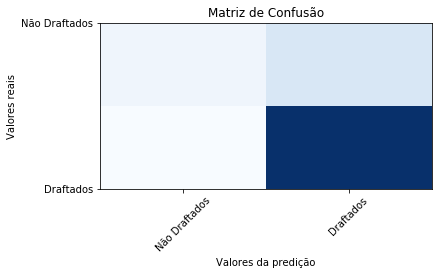

In [22]:
# plotando a matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.values.T[0], lr_result)
print(cm)


plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Não Draftados', 'Draftados'], rotation=45)
plt.yticks(tick_marks, ['Não Draftados', 'Draftados'])
plt.tight_layout()
plt.ylabel('Valores reais')
plt.xlabel('Valores da predição')
plt.show()

Observe que o modelo possui uma alta qualidade de acertos para os jogadores draftados, tal fato pode ter como explicação o fato da base de daos possuir um alto número de jogadores draftados e um baixo numero de não draftados. Esse fato pode explicar um enviesamento do modelo por parte dos jogadores draftados, criando uma tendência maior em classificá-los como promissores atletas da NBA. É possível observar a afirmação no quadro seguinte:

In [23]:
print('Quantidade de jogadores draftados:',df[df['drafted']==1].count()[0])
print('Quantidade de jogadores não draftados:',df[df['drafted']!=1].count()[0])

Quantidade de jogadores draftados: 1211
Quantidade de jogadores não draftados: 433


Como temos uma classificação baseada em multi parâmetros, é, de certa forma, difícil entender como o modelo funciona. Entretanto faremos testes permutando as categorias (*colleges*) a  fim de observar o comportamento da aprovação dos jogadores por parte das universidades. Tal permutação será realizada com a troca do atributo *college* de cada jogador para que no fim possamos analisar a quantidade de aprovações de cada instituição de ensino, portanto, nesse momento faremo sum teste iterando entre os *colleges*, em cada iteração, todos os jogadores serão inseridos na mesma universidade, e então analisaremos a quantidade de aprovações preditas pelo modelo.

Se há uma boa precisão para jogadores aprovados no draft, então tentaremos observar, segundo o modelo, quais as universidade mais aprovam dado que a precisão do modelo é superior a 80%. Nessa análise será possível avaliar se há poucas universidades com altas taxas de aprovação ou não; a resposta obtida será suficiente para argumentar sobre a possibilidade de um futuro atleta, ser beneficiado no draft dada a escolha de determinado *college* no início da sua carreira nas categorias de base do esporte.

In [24]:
colleges_list = list(colleges_map.values())
# 1 - retirar todos os jogadores de suas universidades
X_test[colleges_list] = np.zeros(X_test.shape[0]*len(colleges_list)).reshape(X_test.shape[0],len(colleges_list))
# 2 - Permutar nos colleges, alterando o parâmetro college de cada jogador
drafted_prediction = dict()

for college in colleges_list:
    X_test[college] = np.ones(X_test.shape[0])
    current_result = lr_model.predict(X_test)
    drafted_prediction[college] = np.sum(current_result)
    X_test[college] = np.zeros(X_test.shape[0])
    
print(drafted_prediction)

{'oregon_state': 291, 'arizona': 319, 'indiana': 312, 'purdue': 319, 'connecticut': 306, 'oregon': 313, 'pittsburgh': 283, 'kentucky': 289, 'temple': 234, 'kansas': 307, 'xavier': 285, 'iowa': 279, 'texas_a&m': 272, 'auburn': 235, 'stanford': 318, 'gonzaga': 212, 'colgate': 279, 'memphis': 276, 'michigan_state': 309, 'lamar': 227, 'seton_hall': 268, 'florida': 277, 'florida_state': 312, 'wake_forest': 288, 'california-santa_barbara': 241, 'wisconsin': 237, 'colorado': 255, 'barton_community_college': 284, 'pepperdine': 213, 'new_mexico': 312, 'maryland': 319, 'usc': 237, 'tennessee': 298, 'villanova': 278, 'california': 303, 'georgetown': 263, 'alabama': 227, 'houston': 182, 'arizona_state': 307, 'georgia_tech': 268, 'louisville': 322, 'marquette': 289, 'depaul': 236, 'duke': 309, 'texas_tech': 248, 'utah': 284, 'college_of_charleston': 295, 'arkansas': 250, 'st._bonaventure': 209, 'lebanon_valley': 272, 'syracuse': 319, 'mississippi': 305, 'north_carolina': 316, 'nevada-las_vegas': 22

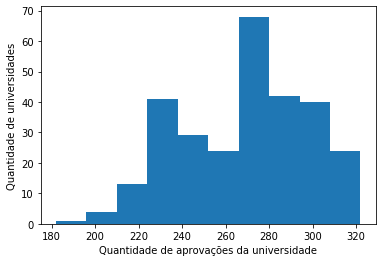

In [25]:
plt.hist(list(map(lambda x: x[1], sorted(drafted_prediction.items(), key=lambda x: x[1]))))
plt.xlabel('Quantidade de aprovações da universidade')
plt.ylabel('Quantidade de universidades')
plt.show()

Com base nas informações obtidas, plotou-se um histograma que demonstra o comportamento da quantidade de jogadores que cada *college* ascendeu à NBA, segundo o modelo. A análise permite demonstrar que há muitas universidade capazes de promovem os jogadores e que existe um comportamento em que não somente as universidades destacadas na análise exploratória, como Kentucky, UCLA, North Carolina e Duke, são resposnáveis pelo alto grau de aprovações. Sendo assim, infere-se que a variável *college* não possui um peso tão alto nas escolhas do draft, uma vez que outras universidades conseguiram aprovar mais jogadores no modelo, muito provavelmente, baseados na qualidade de tais jogadores (*scouts*). 

A seguir, observe a quantidade de jogadores aprovados pelas 4 universidades destacadas no paragrafo anterior, e note que apesar de ocuparem as primeira colocações na análise exploratória, não ocupam as primeiras posições segundo o modelo. O que agrega fatores de veracidade das hipóteses levantadas neste trabalho.

In [26]:
print('Kentucky: ', drafted_prediction['kentucky'])
print('North Carolina:', drafted_prediction['north_carolina'])
print('UCLA:', drafted_prediction['ucla'])
print('Duke:', drafted_prediction['duke'])

Kentucky:  289
North Carolina: 316
UCLA: 293
Duke: 309


## Conclusão

A intenção deste trabalho foi construir um fluxo de raciocínio para criação de hipóteses que possiblitaram aprofundamento de estudos a cerca dos dados explorados. Nesse sentido, a análise incial permitiu a avaliação da primeira questão levantada "**Existem universidades que se destacam no draft?**", de forma que observou-se a existência de universidades que enviaram mais jogadores que as demais para a NBA. Nesse mesmo cenário, quis-se observar se esta era a única variável que poderia definir a convocação para a liga americana de basquete, e pôde-se concluir que há diversos atributos que determinam a aprovação e reprovação de um alteta.

Após tal levantamento, criou-se uma nova pergunta para visualizar a influência dos *colleges* na NBA. Através de uma outra base da dados, comparou-se a quantidade de *Allstars* de acordo com cada universidade, ou seja, quantos "astros" do basquete cada instituição de ensino promoveu. Para isso, motiou-se pela questão "**Qual a relação entre ser um AllStar e ser draftado a partir de determinada universidade?**" e através de um teste de permutação pôde-se concluir que há uma relação aleatória entre a universidade e os *AllStars*. Então por fim, por conta destes dois resultados necessitou-se de duas formas de prever os parâmetros de um jogador a fim de solucionar a questão "**Há universidades que aumentam as chances de determinado jogador sejam draftados ou não?**"


Para responder ultima pergunta, iniciou-se com a hipótese de que o atributo *college* não é o único fator determinante para um jogador aprovado no draft. Então através de um certo conhecimento com base nos *scouts* da NBA, que possibilitou a afirmação de sobre o atributo *Usage Percentage* ser muito importante na análise dos requisitos de um atleta, elaborou-se uma regressão linear capaz de prever qual a quantidade desse atributo em relação aos demais, que obteve, de certa forma, bons resultados, próximos aos originais.

Por fim, um método de aprendizagem de máquina por classificação, foi utilizado para prever se determinado jogador seria ou não convocado por uma equipe de acordo com seu *college* os demais *scouts*. Tal classificador, teve um bom desempenho ao prever os casos de teste, então para averiguar a qualidade desse modelo, frente a casos inesperados, os dados de teste foram permutados na categoria *college* para observar o comportamento da quantidade de alunos que cada universidade conseguiria aprovar para a NBA segundo o modelo classificador. Concluiu-se que apesar de haver universidades que não possuem um bom desemepenho no draft, muitas outras instituições de ensino foram capazes de aprovar muitos jogadores, o que implica em afirmar que os demais parâmetros (*scouts*) são de grande importância na análise, não sendo possível resumir a convocação da liga americana apenas pelo *college* que o atleta se fundou.